In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [2]:
## Load the dataset

In [3]:
train = pd.read_csv("data/train_v9rqX0R.csv", low_memory=False)
test = pd.read_csv("data/test_AbJTz2l.csv", low_memory=False)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [6]:
# Combining train and test datasets for preprocessing
test['Item_Outlet_Sales'] = np.nan
data = pd.concat([train, test], ignore_index=True)

In [7]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [9]:
# Check for missing values
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [10]:
# missing value imputation

In [11]:
# Fill missing Item_Weight with the mode of the respective Item_Identifier
data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.mode()[0]), inplace=True)
data['Item_Weight'].isna().sum()


0

In [12]:
# Fill missing Outlet_Size using mode per Outlet_Type
print(data['Outlet_Size'].unique())
data['Outlet_Size'].fillna(data.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.mode()[0]), inplace=True)
data['Outlet_Size'].isna().sum()

['Medium' nan 'High' 'Small']


0

In [13]:
## Item fat content unique values
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

<Axes: >

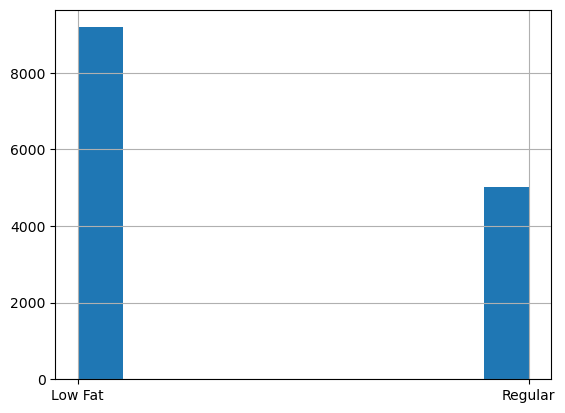

In [14]:
# Standardizing Item_Fat_Content values
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
    'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'
})
data['Item_Fat_Content'].hist()

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


<Axes: >

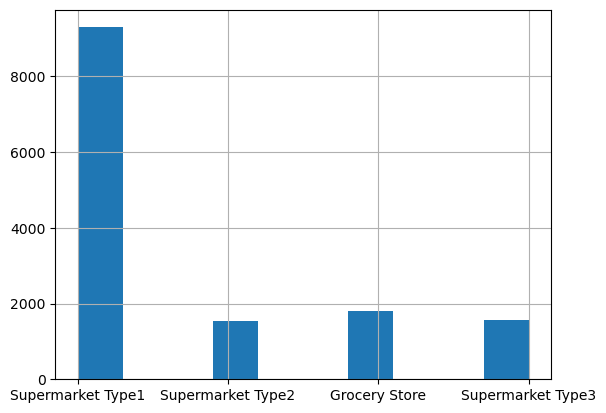

In [15]:
print(data['Outlet_Type'].unique())
data['Outlet_Type'].hist()

<Axes: >

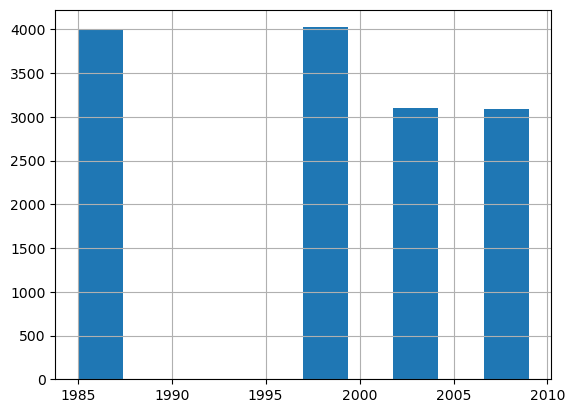

In [16]:
data['Outlet_Establishment_Year'].hist()

In [17]:
# Create New Feature: Outlet_Years
data['Outlet_Years'] = 2010 - data['Outlet_Establishment_Year']

In [18]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [19]:
## make groups for item type
perishables = ['Dairy', 'Fruits and Vegetables', 'Meat', 'Frozen Foods', 'Seafood', 'Breads', 'Breakfast']
non_perishables = ['Canned', 'Baking Goods', 'Starchy Foods', 'Household', 'Health and Hygiene']
consumables = ['Snack Foods', 'Soft Drinks', 'Hard Drinks']
other = ['Others']

def group_item_type(x):
    if x in perishables:
        return 'Perishable'
    elif x in non_perishables:
        return 'Non-Perishable'
    elif x in consumables:
        return 'Consumables'
    else:
        return 'Others'

data['Item_Category_Grouped'] = data['Item_Type'].apply(group_item_type)



['Perishable' 'Consumables' 'Non-Perishable' 'Others']


<Axes: >

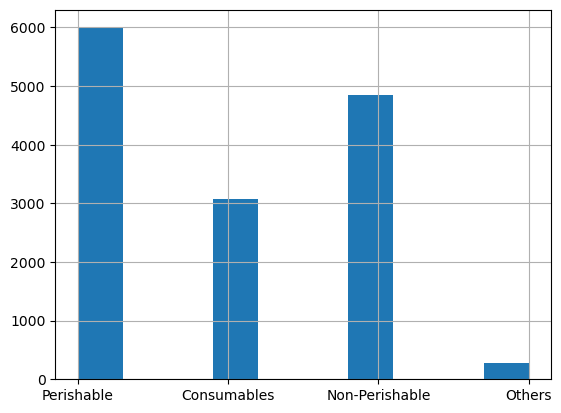

In [20]:
print(data['Item_Category_Grouped'].unique())
data['Item_Category_Grouped'].hist()

['Tier 1' 'Tier 3' 'Tier 2']


<Axes: >

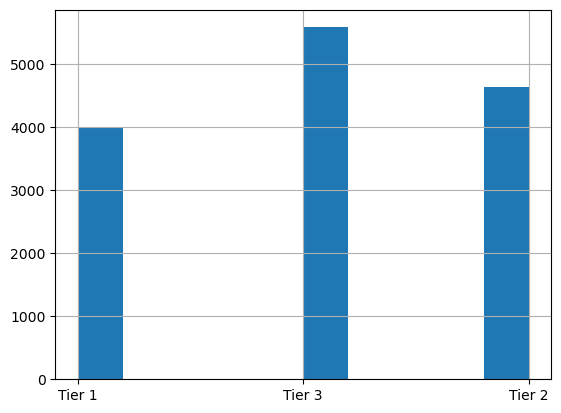

In [21]:
print(data['Outlet_Location_Type'].unique())
data['Outlet_Location_Type'].hist() 

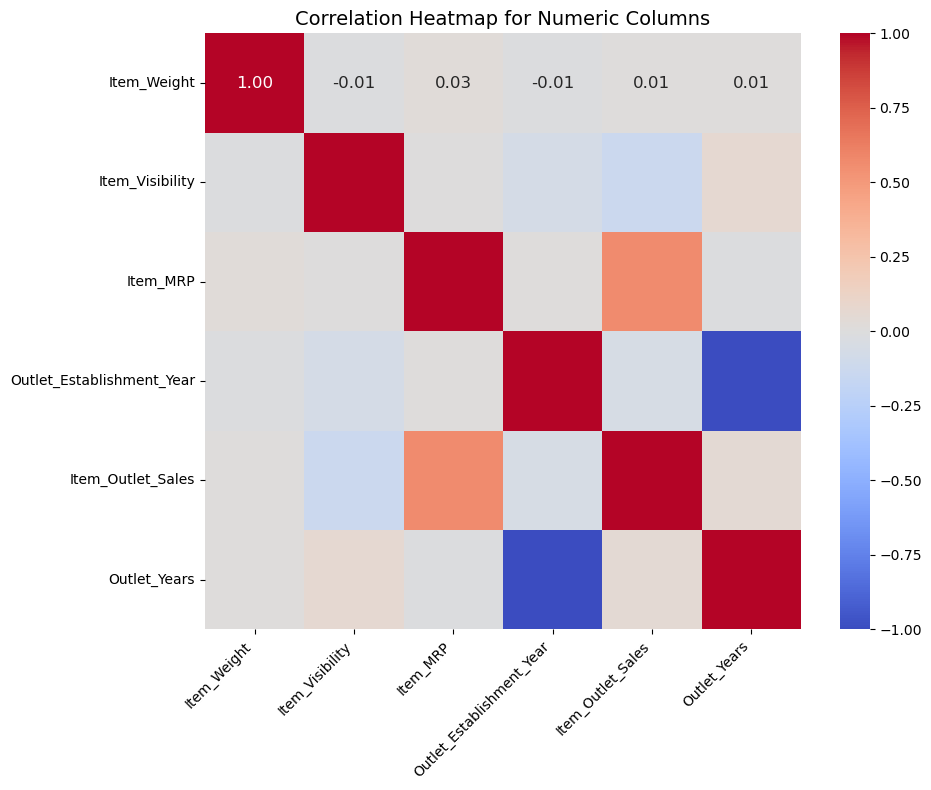

In [22]:
# Plot heatmap for numeric columns in the data DataFrame
train_df = data[~data['Item_Outlet_Sales'].isna()]
numeric_cols = train_df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr().round(2), 
            annot=True,          
            fmt=".2f",    
            cmap='coolwarm',      
            cbar=True,            
            square=True,          
            annot_kws={"size": 12})  

plt.title('Correlation Heatmap for Numeric Columns', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
# numeric_cols.corr().round(2)
# plt.show()

In [23]:
## MRP and Item Visibility has good correlation with Item_Outlet_Sales


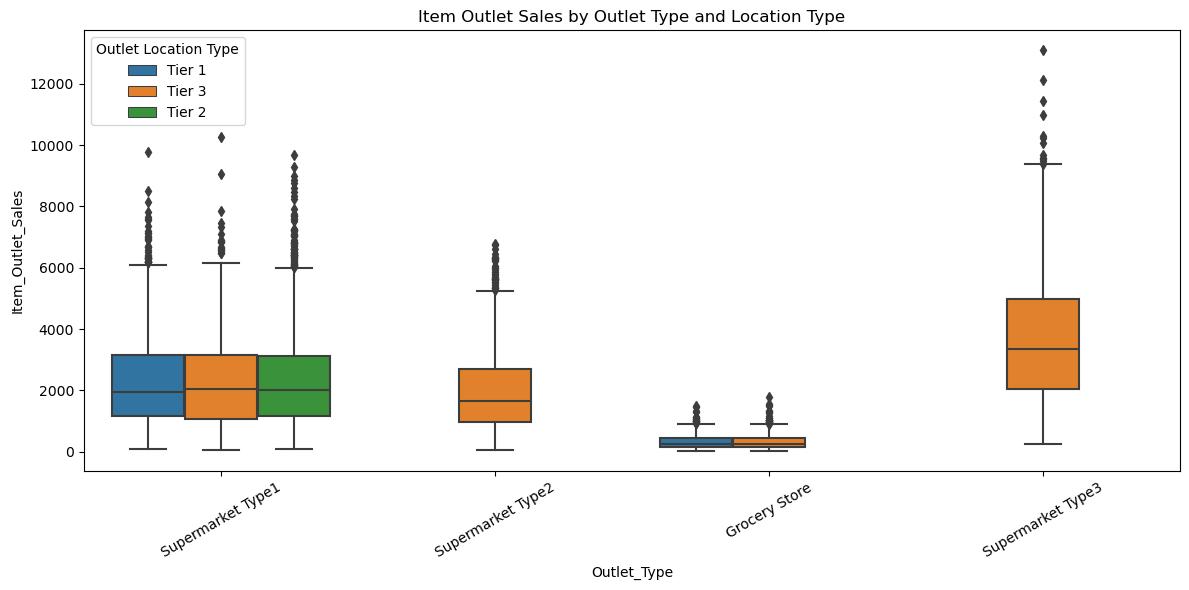

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=train_df,
    x='Outlet_Type',
    y='Item_Outlet_Sales',
    hue='Outlet_Location_Type'
)
plt.title('Item Outlet Sales by Outlet Type and Location Type')
plt.xticks(rotation=30)
plt.legend(title='Outlet Location Type')
plt.tight_layout()
plt.show()

In [25]:
## Grocery stores have lower sales compared to Supermarket Type1 ,Type2 and Type3
## Supermarket Type1 has the highest sales, which is only in Tier 3 

## can make a new feature combining Outlet Type and Location Type

In [26]:
## Feature Engineering

In [27]:
## Outlet Type and Location Type Combination

data['Outlet_Type_Location'] = data['Outlet_Location_Type']+ "_" + data['Outlet_Type']

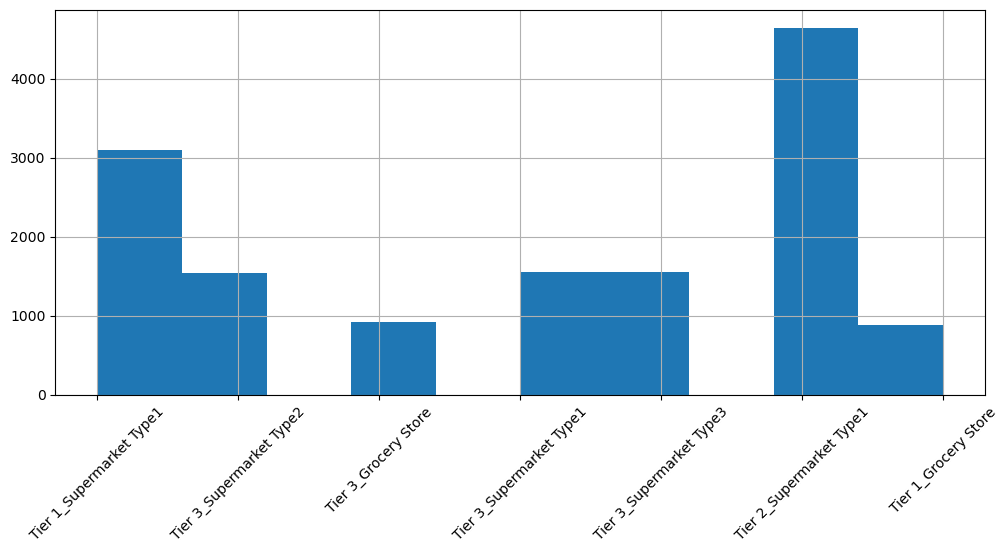

In [28]:
data['Outlet_Type_Location'].hist(figsize=(12, 5))
plt.xticks(rotation=45)
plt.show()

<Axes: >

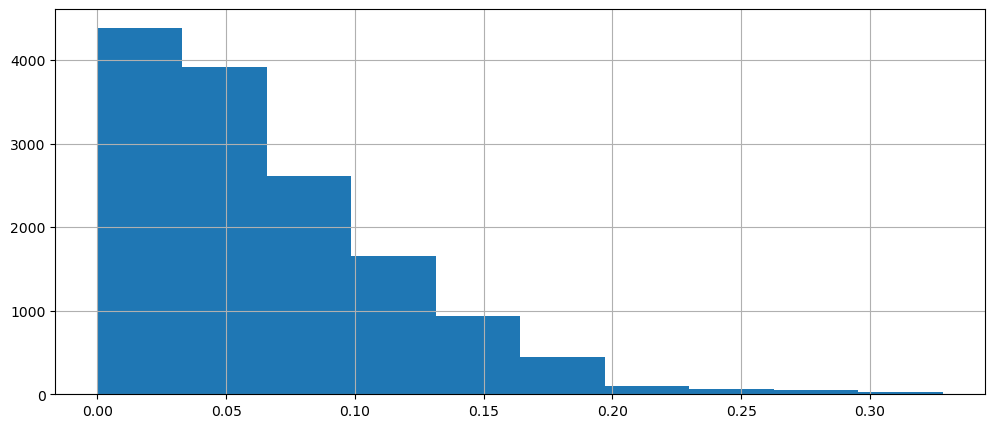

In [29]:
data['Item_Visibility'].hist(figsize=(12, 5))

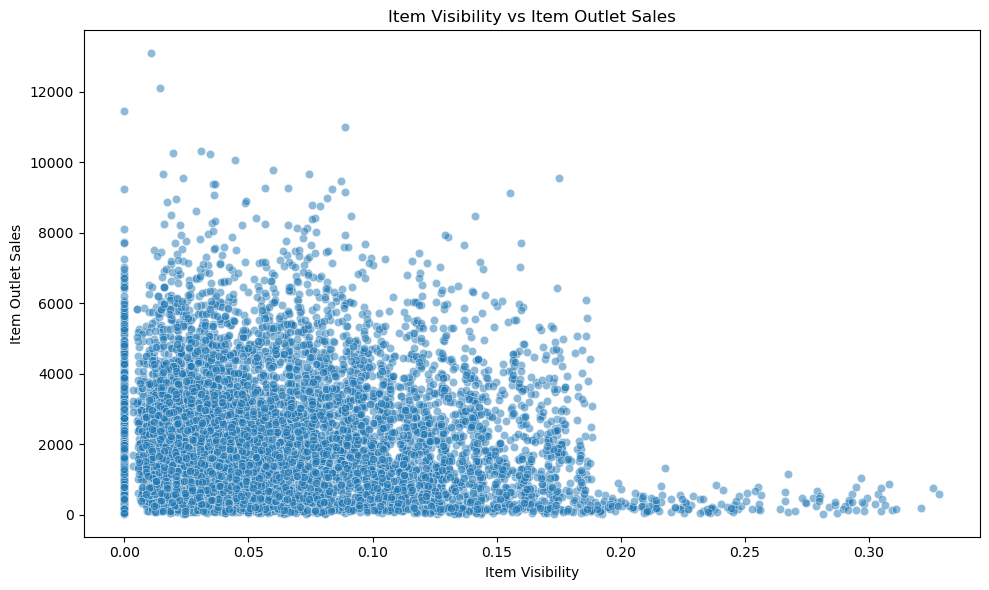

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='Item_Visibility', y='Item_Outlet_Sales', alpha=0.5)
plt.title('Item Visibility vs Item Outlet Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.tight_layout()
plt.show()

In [31]:

# Create New Feature: Item_Visibility_MeanRatio
data['Item_Visibility_MeanRatio'] = data['Item_Visibility'] / data.groupby('Item_Identifier')['Item_Visibility'].transform('mean')
data['Item_Visibility_MeanRatio'].replace([np.inf, -np.inf], 0, inplace=True)
data['Item_Visibility_MeanRatio'].fillna(0, inplace=True)

In [32]:
### visibility binning

data['Visibility_Bin'] = data['Item_Visibility'].apply(lambda x:'High' if x<0.2 else 'Low')

In [33]:
data['Visibility_Bin_Location'] = data['Visibility_Bin']+ "_" +data['Outlet_Location_Type']

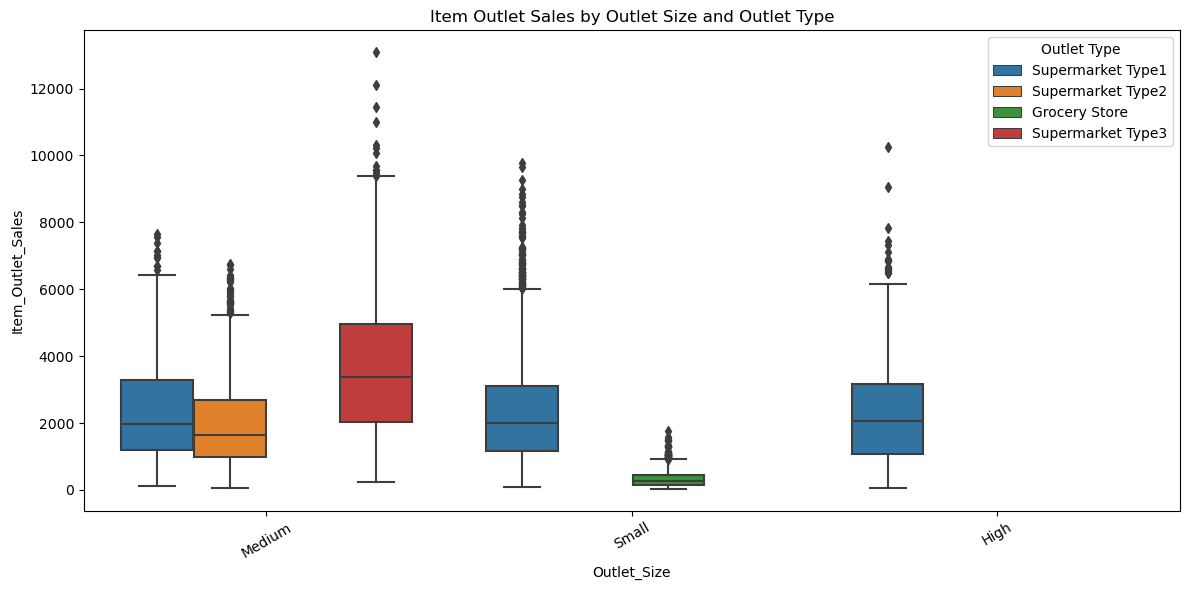

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=train_df,
    x='Outlet_Size',
    y='Item_Outlet_Sales',
    hue='Outlet_Type'
)
plt.title('Item Outlet Sales by Outlet Size and Outlet Type')
plt.xticks(rotation=30)
plt.legend(title='Outlet Type')
plt.tight_layout()
plt.show()

In [35]:
### Ineteraction terms

data['Outlet_Size_Type'] =  data.apply(lambda x:x['Outlet_Size']+"_"+x['Outlet_Type'], axis=1)

In [36]:
data['Price_per_kg'] = data['Item_MRP'] / data['Item_Weight']

In [37]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Category_Grouped,Outlet_Type_Location,Item_Visibility_MeanRatio,Visibility_Bin,Visibility_Bin_Location,Outlet_Size_Type,Price_per_kg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,11,Perishable,Tier 1_Supermarket Type1,0.931078,High,High_Tier 1,Medium_Supermarket Type1,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1,Consumables,Tier 3_Supermarket Type2,0.933420,High,High_Tier 3,Medium_Supermarket Type2,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,11,Perishable,Tier 1_Supermarket Type1,0.960069,High,High_Tier 1,Medium_Supermarket Type1,8.092457
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,12,Perishable,Tier 3_Grocery Store,0.000000,High,High_Tier 3,Small_Grocery Store,9.484115
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,23,Non-Perishable,Tier 3_Supermarket Type1,0.000000,High,High_Tier 3,High_Supermarket Type1,6.031512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,13,Consumables,Tier 1_Supermarket Type1,0.874729,High,High_Tier 1,Small_Supermarket Type1,13.458610
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,1,Non-Perishable,Tier 3_Supermarket Type2,0.878292,High,High_Tier 3,Medium_Supermarket Type2,22.255895
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,8,Non-Perishable,Tier 2_Supermarket Type1,1.162245,High,High_Tier 2,Small_Supermarket Type1,11.874400
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,3,Non-Perishable,Tier 2_Supermarket Type1,0.000000,High,High_Tier 2,Small_Supermarket Type1,14.027569


In [38]:
ID_columns = ['Item_Identifier', 'Outlet_Identifier']

In [39]:
train_df = data[~data['Item_Outlet_Sales'].isna()]


In [40]:
### outlet specific metrics 

outlet_avg_sales = train_df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().to_dict()
data['Outlet_Avg_Sales'] = data['Outlet_Identifier'].map(outlet_avg_sales)


outlet_var_sales = train_df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].var().to_dict()
data['Outlet_Var_Sales'] = data['Outlet_Identifier'].map(outlet_var_sales)


outlet_size_avg_sales = train_df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().to_dict()
data['Outlet_Size_Avg_Sales'] = data['Outlet_Size'].map(outlet_size_avg_sales)

outlet_location_avg_sales = train_df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().to_dict()
data['Outlet_Type_Avg_Sales'] = data['Outlet_Location_Type'].map(outlet_location_avg_sales)


outlet_item_count = train_df.groupby('Outlet_Identifier')['Item_Identifier'].nunique().to_dict()
data['Outlet_Item_Count'] = data['Outlet_Identifier'].map(outlet_item_count)

### Item specific metrics

item_avg_sales = train_df.groupby('Item_Identifier')['Item_Outlet_Sales'].mean().to_dict()
data['Item_Avg_Sales'] = data['Item_Identifier'].map(item_avg_sales)


item_var_sales = train_df.groupby('Item_Identifier')['Item_Outlet_Sales'].var().to_dict()
data['Item_Var_Sales'] = data['Item_Identifier'].map(item_var_sales)

In [47]:
# Get list of categorical columns
categorical_cols_le = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply LabelEncoder to each categorical column
le = LabelEncoder()
for col in categorical_cols_le:
    data[col] = le.fit_transform(data[col])

In [48]:
train_df = data[~data['Item_Outlet_Sales'].isna()]

test_df = data[data['Item_Outlet_Sales'].isna()]

In [146]:
# Final list of features
features = [
    'Item_Weight',
    'Item_Visibility', 
    'Item_MRP',
    # 'Price_per_kg',
    'Outlet_Years',
    'Item_Fat_Content', 
    'Outlet_Location_Type',
    'Outlet_Size', 
    'Outlet_Type', 
    'Item_Category_Grouped', 
    'Outlet_Avg_Sales', 
    'Outlet_Size_Type',
    'Outlet_Type_Location',
    'Item_Visibility_MeanRatio',
    'Outlet_Var_Sales', 
    # "Outlet_Item_Count",
    # 'Outlet_Type_Avg_Sales',
    # 'Item_Avg_Sales', 
    # 'Item_Var_Sales',
    # 'Visibility_Bin',
    # 'Visibility_Bin_Location'
]
# categorical_cols = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Category_Grouped','Outlet_Size_Type','Outlet_Type_Location']

# features = [
#     'Item_Weight', 'Item_Visibility', 'Item_MRP',
#     'Outlet_Years',
#     'Outlet_Location_Type',
#     ]

In [147]:
#### now further split train into train and validation

X = train_df[features]
y = train_df['Item_Outlet_Sales']
# y = np.log1p(y)  # Log transformation to reduce skewness
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
X_test = test_df[features]

In [151]:
### trying different models


models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5),
    
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    
    "AdaBoost": AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Support Vector Regressor": SVR(kernel='rbf', C=1.0, epsilon=0.2)
}

metrics = []
for name, model in models.items():
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    r2_train = r2_score(y_train, train_preds)
    rmse_val = np.sqrt(mean_squared_error(y_val, val_preds))
    r2_val = r2_score(y_val, val_preds)
    
    metrics.append({
        'Model': name,
        'RMSE_Train': round(rmse_train, 2),
        'R2_Train': round(r2_train, 2),
        'RMSE_val': round(rmse_val, 2),
        'R2_val': round(r2_val, 2)
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df

d:\Anconda_new\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.445e+09, tolerance: 2.017e+06
  model = cd_fast.enet_coordinate_descent(
d:\Anconda_new\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.446e+09, tolerance: 2.017e+06
  model = cd_fast.enet_coordinate_descent(


,Model,RMSE_Train,R2_Train,RMSE_val,R2_val
0,Linear Regression,1142.24,0.56,1067.19,0.58
1,Ridge Regression,1142.24,0.56,1067.12,0.58
2,Lasso Regression,1142.24,0.56,1067.20,0.58
3,ElasticNet,1142.35,0.56,1066.50,0.58
4,Decision Tree,944.34,0.70,1143.24,0.52
5,Random Forest,899.59,0.73,1032.82,0.61
6,Extra Trees,0.05,1.00,1103.42,0.55
7,AdaBoost,1122.31,0.57,1074.02,0.58
8,Gradient Boosting,920.75,0.71,1053.76,0.59
9,XGBoost,862.09,0.75,1051.69,0.59


In [156]:
## Random Forest model

# Train a RandomForestRegressor on the training data and evaluate on validation set
rf_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rf_model.fit(X_train, y_train)

# Predict on validation and test sets
rf_val_preds = rf_model.predict(X_val)
rf_test_preds = rf_model.predict(X_test)

# Validation metrics
rf_rmse = mean_squared_error(y_val, rf_val_preds, squared=False)
rf_r2 = r2_score(y_val, rf_val_preds)
print(f"RandomForest RMSE: {rf_rmse:.2f}, R2: {rf_r2:.4f}")

# Prepare submission
submission_rf = pd.DataFrame({
    'Item_Identifier': test['Item_Identifier'],
    'Outlet_Identifier': test['Outlet_Identifier'],
    'Item_Outlet_Sales': rf_test_preds
})
submission_rf['Item_Outlet_Sales'].clip(lower=0, inplace=True)
submission_rf.to_csv("submission_rf.csv", index=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:    0.0s finished


RandomForest RMSE: 1018.19, R2: 0.6186


In [149]:
### Catboost Model

In [150]:
from catboost import CatBoostRegressor, Pool
# Create CatBoost Pools
train_pool = Pool(X_train, y_train)
val_pool = Pool(X_val, y_val)
model = CatBoostRegressor(
    iterations=5000,
    learning_rate=0.001,
    depth=6,
    eval_metric='RMSE',
    random_seed=42,
    verbose=100  # Print training progress every 100 iterations
)

# Fit the model
model.fit(X_train, y_train, eval_set=val_pool)
test_preds = model.predict(X_test).flatten()
submission = pd.DataFrame({
    'Item_Identifier': test['Item_Identifier'],
    'Outlet_Identifier': test['Outlet_Identifier'],
    'Item_Outlet_Sales': test_preds
})
submission['Item_Outlet_Sales'].clip(lower=0, inplace=True)
submission.to_csv("submission_catboost.csv", index=False)

0:	learn: 1718.9817306	test: 1651.0729299	best: 1651.0729299 (0)	total: 2.1ms	remaining: 10.5s
100:	learn: 1631.7994338	test: 1563.2485336	best: 1563.2485336 (100)	total: 250ms	remaining: 12.1s
200:	learn: 1554.9240872	test: 1485.7195724	best: 1485.7195724 (200)	total: 458ms	remaining: 10.9s
300:	learn: 1487.9153282	test: 1418.1633418	best: 1418.1633418 (300)	total: 664ms	remaining: 10.4s
400:	learn: 1429.8597756	test: 1359.5004487	best: 1359.5004487 (400)	total: 888ms	remaining: 10.2s
500:	learn: 1379.2317118	test: 1308.4019657	best: 1308.4019657 (500)	total: 1.11s	remaining: 9.97s
600:	learn: 1335.5854362	test: 1264.3286106	best: 1264.3286106 (600)	total: 1.31s	remaining: 9.58s
700:	learn: 1298.1379387	test: 1226.5994870	best: 1226.5994870 (700)	total: 1.53s	remaining: 9.36s
800:	learn: 1265.9013094	test: 1194.1821266	best: 1194.1821266 (800)	total: 1.73s	remaining: 9.07s
900:	learn: 1238.4497783	test: 1166.7184484	best: 1166.7184484 (900)	total: 1.92s	remaining: 8.76s
1000:	learn: 1

In [108]:
# XGBoost Model
xgb_model = XGBRegressor(
    n_estimators=5000,
    learning_rate=0.001,
    max_depth=6,
    random_state=42,
    n_jobs=-1,
    verbosity=1,
    early_stopping_rounds=50,

)

xgb_model.fit(X_train, y_train, 
              eval_set=[(X_val, y_val)], 
              verbose=100)

# Predict on test set
xgb_test_preds = xgb_model.predict(X_test)
submission_xgb = pd.DataFrame({
    'Item_Identifier': test['Item_Identifier'],
    'Outlet_Identifier': test['Outlet_Identifier'],
    'Item_Outlet_Sales': xgb_test_preds
})
submission_xgb['Item_Outlet_Sales'].clip(lower=0, inplace=True)
submission_xgb.to_csv("submission_xgb.csv", index=False)

[0]	validation_0-rmse:1650.97069
[100]	validation_0-rmse:1555.89780
[200]	validation_0-rmse:1473.59008
[300]	validation_0-rmse:1402.66542
[400]	validation_0-rmse:1341.63876
[500]	validation_0-rmse:1289.20174
[600]	validation_0-rmse:1244.77575
[700]	validation_0-rmse:1207.79105
[800]	validation_0-rmse:1176.85464
[900]	validation_0-rmse:1151.05860
[1000]	validation_0-rmse:1129.67957
[1100]	validation_0-rmse:1112.02809
[1200]	validation_0-rmse:1097.64828
[1300]	validation_0-rmse:1085.61397
[1400]	validation_0-rmse:1075.59098
[1500]	validation_0-rmse:1067.47311
[1600]	validation_0-rmse:1060.65111
[1700]	validation_0-rmse:1055.39793
[1800]	validation_0-rmse:1051.63018
[1900]	validation_0-rmse:1048.13483
[2000]	validation_0-rmse:1044.90851
[2100]	validation_0-rmse:1042.70119
[2200]	validation_0-rmse:1041.08383
[2300]	validation_0-rmse:1040.10410
[2400]	validation_0-rmse:1039.40685
[2500]	validation_0-rmse:1038.71315
[2600]	validation_0-rmse:1038.32022
[2651]	validation_0-rmse:1038.39049


In [107]:
import lightgbm as lgb

# Prepare LightGBM datasets
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

# Set parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'max_depth': 6,
    'random_state': 42,
    'verbosity': -1
}

# Train the model
lgb_model = lgb.train(
    params,
    lgb_train,
    num_boost_round=5000,
    valid_sets=[lgb_train, lgb_val],
    valid_names=['train', 'valid'],
    # early_stopping_rounds=50,
    # verbose_eval=100
)

# Predict on test set
lgb_test_preds = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
submission_lgb = pd.DataFrame({
    'Item_Identifier': test['Item_Identifier'],
    'Outlet_Identifier': test['Outlet_Identifier'],
    'Item_Outlet_Sales': lgb_test_preds
})
submission_lgb['Item_Outlet_Sales'].clip(lower=0, inplace=True)
submission_lgb.to_csv("submission_lgb.csv", index=False)

In [112]:
# Train a RandomForestRegressor on the training data and evaluate on validation set
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rf_model.fit(X_train, y_train)

# Predict on validation and test sets
rf_val_preds = rf_model.predict(X_val)
rf_test_preds = rf_model.predict(X_test)

# Validation metrics
rf_rmse = mean_squared_error(y_val, rf_val_preds, squared=False)
rf_r2 = r2_score(y_val, rf_val_preds)
print(f"RandomForest RMSE: {rf_rmse:.2f}, R2: {rf_r2:.4f}")

# Prepare submission
submission_rf = pd.DataFrame({
    'Item_Identifier': test['Item_Identifier'],
    'Outlet_Identifier': test['Outlet_Identifier'],
    'Item_Outlet_Sales': rf_test_preds
})
submission_rf['Item_Outlet_Sales'].clip(lower=0, inplace=True)
submission_rf.to_csv("submission_rf.csv", index=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.1s


RandomForest RMSE: 1031.95, R2: 0.6082


[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 200 out of 200 | elapsed:    0.0s finished


In [120]:
aan_prediction = pd.read_csv("submission_ann.csv")
catboost_prediction = pd.read_csv("submission_catboost.csv")
submission_combined = catboost_prediction.copy()
frac =  0.2 # Adjust this value as needed for blending
submission_combined['Item_Outlet_Sales'] = catboost_prediction['Item_Outlet_Sales']*frac + aan_prediction['Item_Outlet_Sales']*(1-frac)  

In [127]:
submission_combined.to_csv("submission_combined.csv", index=False)